# Activation Comparison in DNN

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.optimizers import Adam

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras import Input

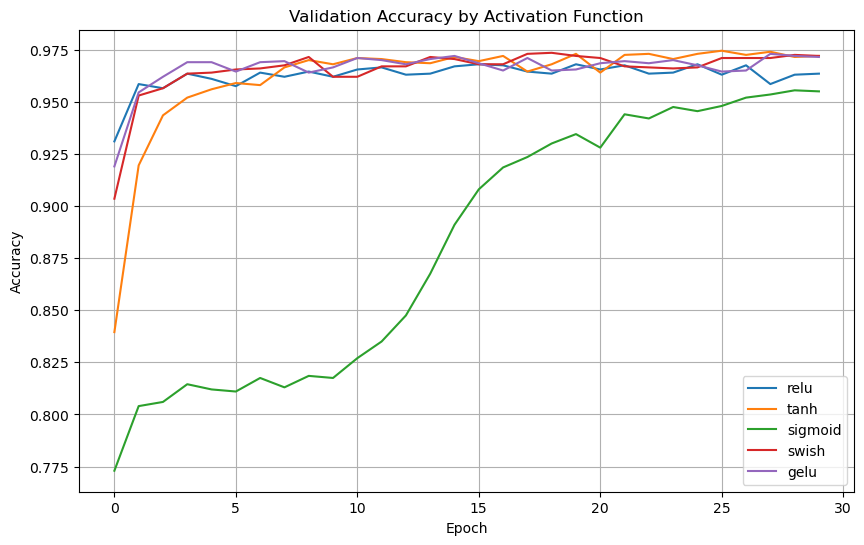

In [6]:

# Create synthetic dataset
X, y = make_classification(n_samples=10000, n_features=20, n_informative=15, n_classes=2, random_state=42)
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build model
# def build_model(activation):
#     model = Sequential([
#         Dense(64, input_dim=20, activation=activation),
#         Dense(64, activation=activation),
#         Dense(1, activation='sigmoid')
#     ])
#     model.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])
#     return model
def build_model(activation):
    model = Sequential([
        Input(shape=(20,)),                        # Explicit input layer
        Dense(64, activation=activation),
        Dense(64, activation=activation),
        Dense(64, activation=activation),
        Dense(64, activation=activation),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model
    
# Test different activations
activations = ['relu', 'tanh', 'sigmoid', 'swish', 'gelu']
results = {}

for act in activations:
    model = build_model(act)
    hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=64, verbose=0)
    results[act] = hist.history['val_accuracy']

# Plot
plt.figure(figsize=(10, 6))
for act in activations:
    plt.plot(results[act], label=act)
plt.title("Validation Accuracy by Activation Function")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()